<a href="https://colab.research.google.com/github/rrhkwk123/Work/blob/main/bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

Main Goal: Figure out the most important economic factor in the data.

In [ ]:
# Load some test data
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import seaborn as sns

bank_master_data = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')

economic_features = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

X = pd.get_dummies(bank_master_data[economic_features], drop_first=True)
y = bank_master_data['y'].map(dict(yes=1, no=0))

sm = SMOTE(random_state=42)
X_SMOTE, y_SMOTE = sm.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_SMOTE, y_SMOTE, test_size=0.30, random_state=42)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


# Cross Validation

Cross validation will be used to make sure that the data is not overfit to the data.

In [ ]:
# Import the libraries for cross validation and models to use in the ensemble.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
from sklearn.model_selection import cross_val_score

# Logistic Regression
log_reg = LogisticRegression()
log_scores = cross_val_score(log_reg, X_train, y_train, cv=3)
log_reg_mean = log_scores.mean()

# SVC
svc_clf = SVC()
svc_scores = cross_val_score(svc_clf, X_train, y_train, cv=3)
svc_mean = svc_scores.mean()

# KNearestNeighbors
knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, X_train, y_train, cv=3)
knn_mean = knn_scores.mean()

# Decision Tree
tree_clf = tree.DecisionTreeClassifier()
tree_scores = cross_val_score(tree_clf, X_train, y_train, cv=3)
tree_mean = tree_scores.mean()

# Gradient Boosting Classifier
grad_clf = GradientBoostingClassifier()
grad_scores = cross_val_score(grad_clf, X_train, y_train, cv=3)
grad_mean = grad_scores.mean()

# Random Forest Classifier
rand_clf = RandomForestClassifier(n_estimators=18)
rand_scores = cross_val_score(rand_clf, X_train, y_train, cv=3)
rand_mean = rand_scores.mean()

# NeuralNet Classifier
neural_clf = MLPClassifier(alpha=1)
neural_scores = cross_val_score(neural_clf, X_train, y_train, cv=3)
neural_mean = neural_scores.mean()

# Naives Bayes
nav_clf = GaussianNB()
nav_scores = cross_val_score(nav_clf, X_train, y_train, cv=3)
nav_mean = neural_scores.mean()

# Create a Dataframe with the results.
d = {'Classifiers': ['Logistic Reg.', 'SVC', 'KNN', 'Dec Tree', 'Grad B CLF', 'Rand FC', 'Neural Classifier', 'Naives Bayes'], 
    'Crossval Mean Scores': [log_reg_mean, svc_mean, knn_mean, tree_mean, grad_mean, rand_mean, neural_mean, nav_mean]}

result_df = pd.DataFrame(data=d)

result_df = result_df.sort_values(by=['Crossval Mean Scores'], ascending=False)
result_df

,Classifiers,Crossval Mean Scores
3,Dec Tree,0.749370
5,Rand FC,0.748979
4,Grad B CLF,0.747240
0,Logistic Reg.,0.719702
1,SVC,0.719702
2,KNN,0.703891
6,Neural Classifier,0.560149
7,Naives Bayes,0.560149


# Confusion Matrix

The confusion matrix helps us to see the predictions made by the different models.

In [ ]:
# Cross validate our three best predictors based on coss validation scores
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

tree_clf_y_train_pred = cross_val_predict(tree_clf, X_train, y_train, cv=3)
grad_clf_y_train_pred = cross_val_predict(grad_clf, X_train, y_train, cv=3)
rand_clf_y_train_pred = cross_val_predict(rand_clf, X_train, y_train, cv=3)

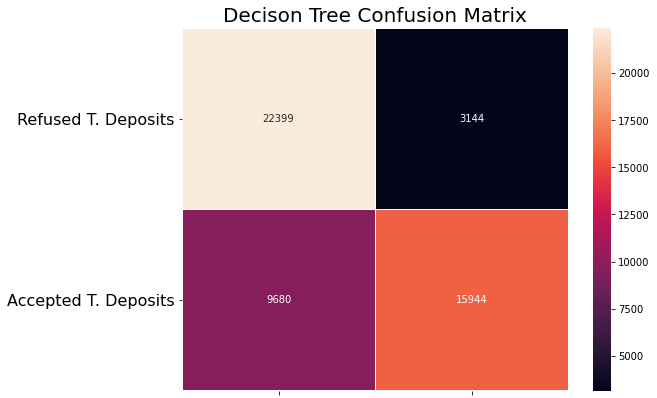

In [ ]:
# Decision Tree Confusion Matrix
conf_matrix = confusion_matrix(y_train, tree_clf_y_train_pred)
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Decison Tree Confusion Matrix", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels("")
ax.set_yticklabels(['Refused T. Deposits', 'Accepted T. Deposits'], fontsize=16, rotation=360)
plt.show()

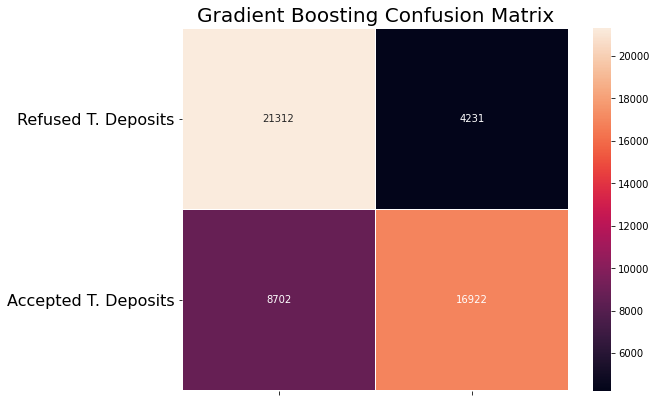

In [ ]:
# Gradient Boosting Confusion Matrix
conf_matrix = confusion_matrix(y_train, grad_clf_y_train_pred)
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Gradient Boosting Confusion Matrix", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels("")
ax.set_yticklabels(['Refused T. Deposits', 'Accepted T. Deposits'], fontsize=16, rotation=360)
plt.show()

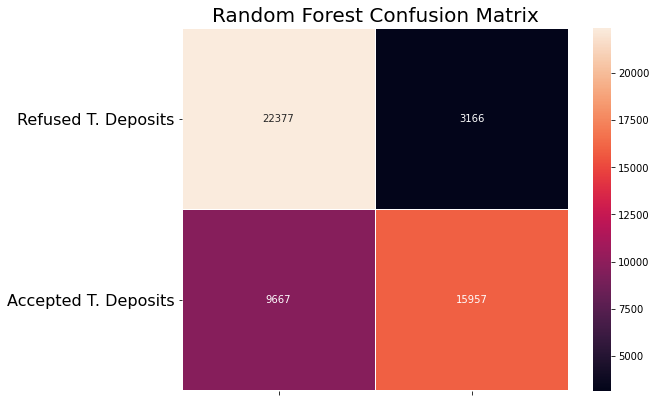

In [ ]:
# Random Forest Confusion Matrix
conf_matrix = confusion_matrix(y_train, rand_clf_y_train_pred)
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Random Forest Confusion Matrix", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels("")
ax.set_yticklabels(['Refused T. Deposits', 'Accepted T. Deposits'], fontsize=16, rotation=360)
plt.show()

# Precision & Recall

In [ ]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

In [ ]:
print('Decision Tree Scores')
print('Precision Score: ', precision_score(y_train, tree_clf_y_train_pred))
print('Recall Score: ', recall_score(y_train, tree_clf_y_train_pred))
print('\n')

print('Gradient Boosting Scores')
print('Precision Score: ', precision_score(y_train, grad_clf_y_train_pred))
print('Recall Score: ', recall_score(y_train, grad_clf_y_train_pred))
print('\n')

print('Random Forest Scores')
print('Precision Score: ', precision_score(y_train, rand_clf_y_train_pred))
print('Recall Score: ', recall_score(y_train, rand_clf_y_train_pred))

Decision Tree Scores
Precision Score:  0.8352891869237217
Recall Score:  0.6222291601623477


Gradient Boosting Scores
Precision Score:  0.799981090152697
Recall Score:  0.6603965032781767


Random Forest Scores
Precision Score:  0.834440202897035
Recall Score:  0.6227364970340306


# ROC Curve

In [ ]:
grad_y_scores = cross_val_predict(grad_clf, X_train, y_train, cv=3, method="decision_function")
tree_y_scores = cross_val_predict(tree_clf, X_train, y_train, cv=3, method="predict_proba")
rand_y_scores = cross_val_predict(rand_clf, X_train, y_train, cv=3, method="predict_proba")

if grad_y_scores.ndim == 2:
    grad_y_scores = grad_y_scores[:, 1]

if tree_y_scores.ndim == 2:
    tree_y_scores = tree_y_scores[:, 1]
    
if rand_y_scores.ndim == 2:
    rand_y_scores = rand_y_scores[:, 1]

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Gradient Boosting Classifier
# Decision Tree Classifier
# Random Forest Classifier
grad_fpr, grad_tpr, grad_thresold = roc_curve(y_train, grad_y_scores)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_y_scores)
rand_fpr, rand_tpr, rand_threshold = roc_curve(y_train, rand_y_scores)


print('Gradient Boost Classifier Score: ', roc_auc_score(y_train, grad_y_scores))
print('Decision Tree Classifier Score: ', roc_auc_score(y_train, tree_y_scores))
print('Random Forest Classifier: ', roc_auc_score(y_train, rand_y_scores))

Gradient Boost Classifier Score:  0.801356053694523
Decision Tree Classifier Score:  0.8066493291466452
Random Forest Classifier:  0.806415480001651


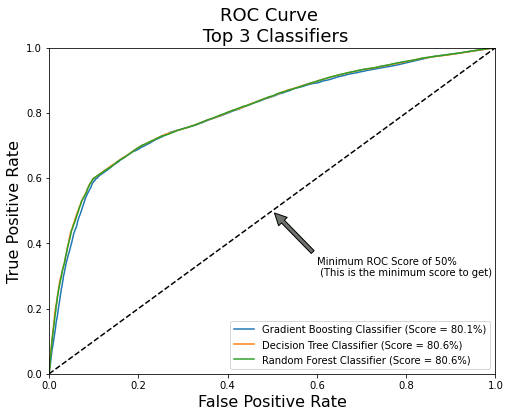

In [ ]:
def graph_roc_curve_multiple(grad_fpr, grad_tpr, tree_fpr, tree_tpr, rand_fpr, rand_tpr):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve \n Top 3 Classifiers', fontsize=18)
    plt.plot(grad_fpr, grad_tpr, label='Gradient Boosting Classifier (Score = 80.1%)')
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier (Score = 80.6%)')
    plt.plot(rand_fpr, rand_tpr, label='Random Forest Classifier (Score = 80.6%)')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(grad_fpr, grad_tpr, tree_fpr, tree_tpr, rand_fpr, rand_tpr)
plt.show()

# Decision Tree

This helps us determine the factors that make the most difference from an economic standpoint.

Feature ranking:
1. feature 4 (0.650948)
2. feature 3 (0.160939)
3. feature 2 (0.129208)
4. feature 1 (0.058807)
5. feature 0 (0.000098)


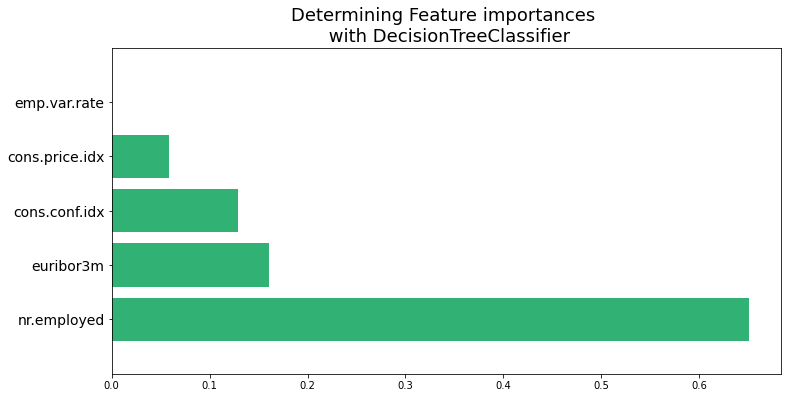

In [ ]:
decision_tree = tree.DecisionTreeClassifier( 
    class_weight='balanced')

decision_tree.fit(X_train, y_train)
importances = decision_tree.feature_importances_
feature_names = bank_master_data[economic_features].columns
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
def feature_importance_graph(indices, importances, feature_names):
    plt.figure(figsize=(12,6))
    plt.title("Determining Feature importances \n with DecisionTreeClassifier", fontsize=18)
    plt.barh(range(len(indices)), importances[indices], color='#31B173',  align="center")
    plt.yticks(range(len(indices)), feature_names[indices], rotation='horizontal',fontsize=14)
    plt.ylim([-1, len(indices)])
    
feature_importance_graph(indices, importances, feature_names)
plt.show()

# Model Ensemble

In [ ]:
# Our three classifiers are grad_clf, nav_clf and neural_clf
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[('gbc', grad_clf), ('tree', tree_clf), ('rand', rand_clf)],
    voting='soft'
)

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('gbc',
                              GradientBoostingClassifier(ccp_alpha=0.0,
                                                         criterion='friedman_mse',
                                                         init=None,
                                                         learning_rate=0.1,
                                                         loss='deviance',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                             

Model Predictions
0 means the term deposit was rejected.
1 means the term deposit was accepted.

GradientBoostingClassifier Accuracy Score 0.7399790232112727
GradientBoostingClassifier Precision Score:  0.7936347278452541
GradientBoostingClassifier Recall Score:  0.6460087879897474
[[    0 13037]
 [    1  8892]]



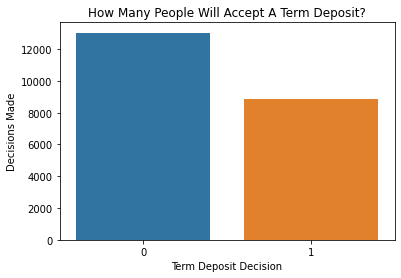

DecisionTreeClassifier Accuracy Score 0.7449040083907155
DecisionTreeClassifier Precision Score:  0.81877990430622
DecisionTreeClassifier Recall Score:  0.6266019772976932
[[    0 13569]
 [    1  8360]]



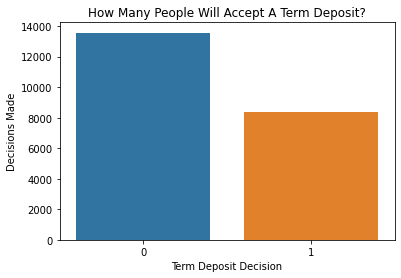

RandomForestClassifier Accuracy Score 0.7446759998175931
RandomForestClassifier Precision Score:  0.8183666148511299
RandomForestClassifier Recall Score:  0.6265104357378249
[[    0 13566]
 [    1  8363]]



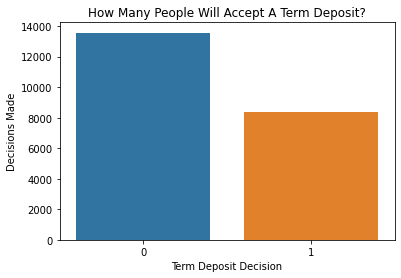

VotingClassifier Accuracy Score 0.7447216015322176
VotingClassifier Precision Score:  0.8167221693625119
VotingClassifier Recall Score:  0.6286158916147931
[[    0 13521]
 [    1  8408]]



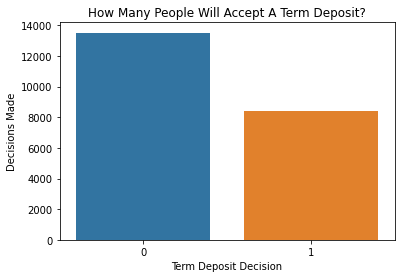

In [ ]:
from sklearn.metrics import accuracy_score

print('Model Predictions')
print('0 means the term deposit was rejected.')
print('1 means the term deposit was accepted.', end='\n\n')

for clf in (grad_clf, tree_clf, rand_clf, voting_clf):
    clf.fit(X_train, y_train)
    predict = clf.predict(X_test)
    unique, counts = np.unique(predict, return_counts=True)
    print(clf.__class__.__name__, 'Accuracy Score', accuracy_score(y_test, predict))
    print(clf.__class__.__name__, 'Precision Score: ', precision_score(y_test, predict))
    print(clf.__class__.__name__, 'Recall Score: ', recall_score(y_test, predict))
    print(np.asarray((unique, counts)).T, end='\n\n')
    plt.figure()
    sns.barplot(x=unique, y=counts).set(
        xLabel="Term Deposit Decision",
        yLabel="Decisions Made",
        title="How Many People Will Accept A Term Deposit?"
    )
    plt.show()


Based on the training data for the given models, can make some assumptions about the economic conditions. Once our models were trained, we found that there is about a 2 to 1 ratio in favor of those that reject the term deposit. This is much lower than the 89% of people who rejected the term deposit in the raw data. Therefore, we can infer that the economic conditions certainly have something to do with the decisions made by people but they are by no means the only factors that people base their decisions on.